Convert text file to csv
If province is 0 drop the row
If deaths, confirmed rows data is null, replace with 0
Count total drop rows and null value
Data visualize with matplotlib (deaths, confirmed), histogram or scatter or line chart
Manually add data type in the csv file
Show location in map using streamlit
Push code to a github public repo and share line here

In [62]:
import numpy as np

In [63]:
import pandas as pd
  

df = pd.read_csv("dataset.txt",sep= " ")
  
# storing this dataframe in a csv file
df.to_csv('dataset.csv', index = None)

In [64]:
#dropping province=0
tmp =[]
if df["Province_State"].isin([0]) is True:
  tmp.append(df["Province_State"])
print("No of rows with 0 in province state is:",len(tmp))
#it gives false as there are no entries with 0

df = df[df.Province_State != 0] #drop any rows that have 0 in the Province_State column



No of rows with 0 in province state is: 0


In [65]:
#counting null values in confirmed death column
nullcount1 = df["Confirmed"].isnull().sum()
print("Total null values in confirmed death column:",nullcount1)
df["Confirmed"].replace(np.nan,0)

#counting null values in  death column
nullcount2 = df["Deaths"].isnull().sum()
print("Total null values in confirmed death column:",nullcount2)
df["Deaths"].replace(np.nan,0)

Total null values in confirmed death column: 4
Total null values in confirmed death column: 5


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
325432    1.0
325433    1.0
325434    1.0
325435    0.0
325436    0.0
Name: Deaths, Length: 325437, dtype: float64

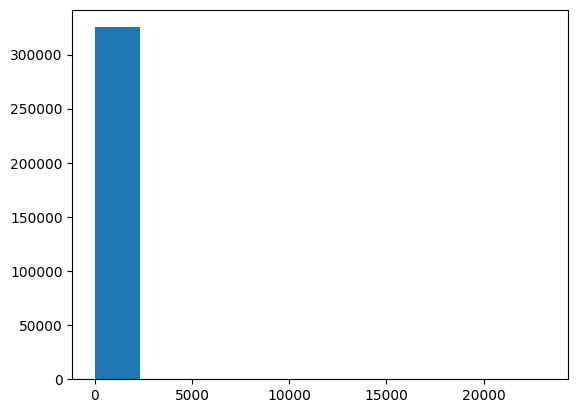

In [70]:
import matplotlib.pyplot as plt

x = df["Deaths"]

plt.hist(x)
plt.show()

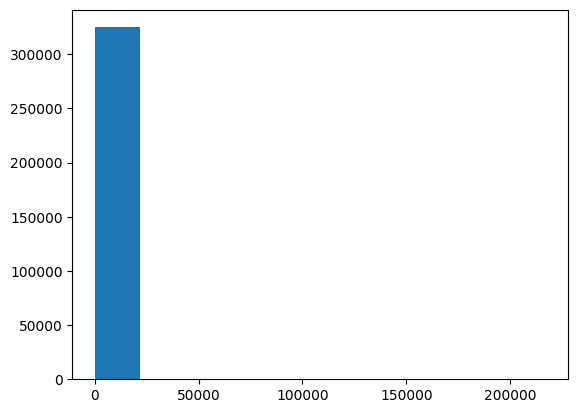

In [71]:
import matplotlib.pyplot as plt

x = df["Confirmed"]

plt.hist(x)
plt.show()

In [58]:
for dtype in df.dtypes.iteritems(): #printing data types
    print(dtype)

('Province_State', dtype('O'))
('Country_Region', dtype('O'))
('Lat', dtype('float64'))
('Long', dtype('float64'))
('Date', dtype('O'))
('Confirmed', dtype('float64'))
('Deaths', dtype('float64'))


<ipython-input-58-1535a789b636>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for dtype in df.dtypes.iteritems(): #printing data types


In [59]:
#renaming columns with the data type along with its exisiting name

df.rename(
    columns=({ 'Province_State': 'Province_State O', 'Country_Region': 'Country_Region O' , 'Lat': 'Lat float64' , 'Long': 'Long float64', 'Date': 'Date O',
               'Confirmed': 'Confirmed float64', 'Deaths':'Deaths float64' }), 
    inplace=True,
)
df.head()

,Province_State O,Country_Region O,Lat float64,Long float64,Date O,Confirmed float64,Deaths float64
0,Alabama,US,32.539527,-86.644082,1/22/20,0.0,0.0
1,Alabama,US,30.727750,-87.722071,1/22/20,0.0,0.0
2,Alabama,US,31.868263,-85.387129,1/22/20,0.0,0.0
3,Alabama,US,32.996421,-87.125115,1/22/20,0.0,0.0
4,Alabama,US,33.982109,-86.567906,1/22/20,0.0,0.0


In [72]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [83]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.514s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [84]:
!streamlit run app.py &>/content/logs.txt &

In [85]:
!npx localtunnel --port 8501

npx: installed 22 in 1.741s
your url is: https://lovely-hairs-teach.loca.lt
^C


In [87]:
%%writefile newapp.py

import streamlit as st
st.map(df)

Writing newapp.py
